In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import sklearn


In [7]:
#air_quality_no2 = air_quality_no2[["date.utc", "location","parameter", "value"]]

#air_quality_pm25 = air_quality_pm25[["date.utc", "location","parameter", "value"]]

no2 = pd.read_csv('no2.csv')
no2 = no2[['date.utc', 'location', 'parameter', 'value']]
no2

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4
...,...,...,...,...
2063,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0
2064,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0
2065,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0
2066,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0


In [14]:

pm25 = pd.read_csv('pm2.5.csv')
pm25 = pm25[['date.utc', 'location', 'parameter', 'value']]
pm25

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5
...,...,...,...,...
1105,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0
1106,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0
1107,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0
1108,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0


In [15]:
joined = pd.concat([no2, pm25])
joined

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4
...,...,...,...,...
1105,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0
1106,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0
1107,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0
1108,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0


In [21]:
result = pd.merge(no2, pm25, on= ['date.utc','location'], how='inner')
result

,date.utc,location,parameter_x,value_x,parameter_y,value_y
0,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,pm25,6.5
1,2019-06-17 07:00:00+00:00,BETR801,no2,45.0,pm25,18.5
2,2019-06-17 06:00:00+00:00,BETR801,no2,43.5,pm25,16.0
3,2019-06-17 05:00:00+00:00,BETR801,no2,42.5,pm25,7.5
4,2019-06-17 04:00:00+00:00,BETR801,no2,39.5,pm25,7.5
...,...,...,...,...,...,...
1056,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,pm25,9.0
1057,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,pm25,8.0
1058,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,pm25,8.0
1059,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,pm25,8.0


In [23]:
result.to_csv('result')

In [30]:

facilities = pd.read_csv('care_facility.csv')

In [43]:
facilities.groupby(['year', 'sector']).sum().head()


count
year sector               
2006 Not-For-Profit     33
     Private            31
     Public              0
2007 Not-For-Profit     33
     Private            31

<AxesSubplot:ylabel='sector'>

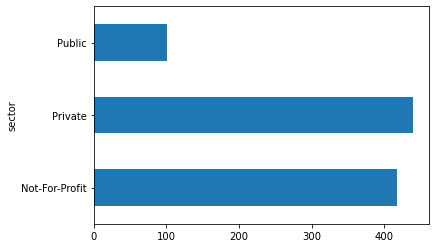

In [41]:
facilities.pivot(columns = 'sector', values = 'count').sum().plot.barh()

In [46]:
facilities = pd.read_csv('health_exp.csv')
facilities1 = facilities.groupby('financial_year').mean()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

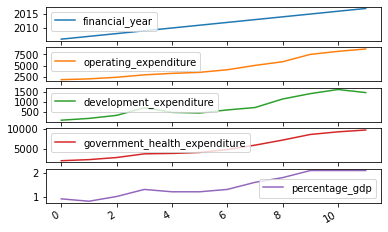

In [47]:
facilities.plot(subplots=True)